In [90]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [101]:
d = 4 # số chiều
df = {
    i+1 : np.random.randint(0,100, size=30)
    for i in range(d)
}
df = pd.DataFrame(df)
df.T

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
1,31,31,1,45,69,34,11,41,14,13,...,41,0,70,74,31,30,9,66,46,54
2,52,30,94,51,35,9,75,22,98,93,...,90,72,59,57,63,17,39,44,98,79
3,35,62,31,62,10,15,42,19,92,23,...,46,89,40,93,61,74,91,82,28,14
4,37,18,47,17,16,86,20,67,80,49,...,13,70,71,96,7,6,51,6,25,72


In [59]:
# Tạo dữ liệu 
df = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
x,12,20,28,18,29,33,24,45,45,52,51,52,55,53,55,61,64,69,72
y,39,36,30,52,54,46,55,59,63,70,66,63,58,23,14,8,19,7,24


In [102]:
# Số cluster 
k = 5

In [93]:
# Tạo số màu tương ứng với Cluter để phân biệt giữa các Cluter
colors = cm.rainbow(np.linspace(0, 1, k))
colors

array([[5.00000000e-01, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.96078431e-03, 7.09281308e-01, 9.23289106e-01, 1.00000000e+00],
       [5.03921569e-01, 9.99981027e-01, 7.04925547e-01, 1.00000000e+00],
       [1.00000000e+00, 7.00543038e-01, 3.78411050e-01, 1.00000000e+00],
       [1.00000000e+00, 1.22464680e-16, 6.12323400e-17, 1.00000000e+00]])

In [94]:
# Chọn ngẫu nhiên K điểm center từ data
def create_center(k):
    r = []
    for i in range(k): r.append(np.random.randint(0, len(df)))
    print(r)
    centroids = {
        i+1: [df['x'][r[i]], df['y'][r[i]]]
        for i in range(k)
    }
    #print(centroids)
    return centroids


In [86]:
def distance_center(cluter):
    distance = 0
    for i in range(d-1):
        distance = distance + (df[i+1] - centroids[cluter][i])**2
    return np.sqrt(distance)

In [112]:
def create_center(k):
    r =  np.random.randint(0, len(df), size = k)
    print(r)
    centroids = {
        i+1: center_array(d,r[i])
        for i in range(k)
    }
    #print(centroids)
    return centroids

In [111]:
def center_array(D,row):
    x = []
    for d in range(D): x.append(df[d+1][row])
    return x

In [118]:
centroids = create_center(k)
centroids

[ 6 11 21 17 25]


{1: [11, 75, 42, 20],
 2: [17, 83, 68, 62],
 3: [0, 72, 89, 70],
 4: [43, 84, 89, 88],
 5: [30, 17, 74, 6]}

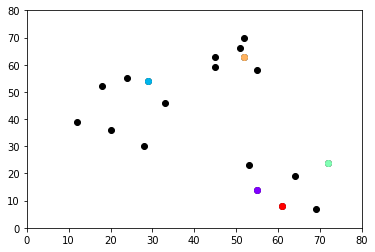

In [73]:
# Vẽ biểu đồ 
plt.scatter(df['x'], df['y'], color='k')
# Vẽ biểu đồ với 3 điểm center
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colors[i-1])

plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()
#ax.legend(fontsize='small')

In [46]:
i = 5
df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0])**2 +
                (df['y'] - centroids[i][1])**2
            )  
        )    
df

,x,y,distance_from_5,distance_from_1,distance_from_2,distance_from_3,distance_from_4,closest,color,distance_from_6
0,12,39,22.671568,47.726434,18.935747,39.661064,8.944272,4,"[0.7, 0.9510565162951536, 0.5877852522924731, ...",NaN
1,20,36,20.124612,43.061729,16.854154,35.355339,1.000000,4,"[0.7, 0.9510565162951536, 0.5877852522924731, ...",NaN
2,28,30,24.020824,42.110717,21.841760,35.355339,9.433981,4,"[0.7, 0.9510565162951536, 0.5877852522924731, ...",NaN
3,18,52,11.180340,36.610279,8.003905,28.460499,17.117243,2,"[0.09999999999999998, 0.5877852522924731, 0.95...",NaN
4,29,54,0.000000,25.638106,3.750000,17.464249,21.023796,2,"[0.09999999999999998, 0.5877852522924731, 0.95...",NaN
5,33,46,8.944272,26.707911,9.058835,19.209373,17.029386,2,"[0.09999999999999998, 0.5877852522924731, 0.95...",NaN
6,24,55,5.099020,29.963519,3.816084,21.840330,20.396078,2,"[0.09999999999999998, 0.5877852522924731, 0.95...",NaN
7,45,59,16.763055,9.154917,20.336236,2.000000,34.655447,3,"[0.30000000000000004, 0.9510565162951535, 0.80...",NaN
8,45,63,18.357560,7.603453,22.080817,2.000000,37.536649,3,"[0.30000000000000004, 0.9510565162951535, 0.80...",NaN
9,52,70,28.017851,5.771698,31.765744,11.401754,47.423623,1,"[0.5, 0.0, 1.0, 1.0]",NaN


In [33]:
centroids_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]

In [38]:
col_name = ['{}'.format(int(i+1)) for i in range(4)]

In [35]:
centroids_distance_cols

['distance_from_1',
 'distance_from_2',
 'distance_from_3',
 'distance_from_4',
 'distance_from_5']

In [88]:
for i in centroids.keys():
        df['distance_from_{}'.format(i)] = (
            distance_center(i)  
        ) 

In [89]:
df

,1,2,3,4,distance_from_1,distance_from_2,distance_from_3,distance_from_4,distance_from_5
0,15,0,23,62,5099,8291,5725,10683,8291
1,86,73,15,62,1325,8321,17619,2673,8321
2,84,28,51,14,3074,3294,8622,3254,3294
3,66,42,91,69,5598,274,4826,2362,274
4,33,45,52,81,1641,2053,4313,2485,2053
5,70,42,36,63,941,3773,9109,2213,3773
6,25,7,10,92,3745,9125,8069,9861,9125
7,94,71,3,55,2153,10893,20819,4365,10893
8,47,54,43,76,603,2691,6929,1451,2691
9,86,15,54,45,4428,3796,8258,4820,3796


In [119]:
# Hàm tính khoảng cách từ mỗi điểm dữ liệu đến mỗi center
def assigment(df, centroids):
    for i in centroids.keys():
        #sqrt((x1-x2)^2 - (y1-y2)^2)
        df['distance_from_{}'.format(i)] = (
            distance_center(i)  
        )     
    centroids_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroids_distance_cols].idxmin(axis=1) # Tìm cluter center gần nhất 
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_'))) # Bỏ đi các ký tự distance_from_
    #df['color'] = df['closest'].map(lambda x: colors[x-1]) # Set màu tương tự center
    return df
    
df = assigment(df, centroids)
print(df)

     1   2   3   4  distance_from_1  distance_from_2  distance_from_3  \
0   31  52  35  37              978             2246             4277   
1   31  30  62  18             2825             3041             3454   
2    1  94  31  47              582             1746             3849   
3   45  51  62  17             2132             1844             3195   
4   69  35  10  16             5988             8372            12371   
5   34   9  15  86             5614             8574            10601   
6   11  75  42  20                0              776             2339   
7   41  22  19  67             4238             6698             9081   
8   14  98  92  80             3038              810              881   
9   13  93  23  49              689             2141             4966   
10  47  53  69  43             2509             1801             2970   
11  17  83  68  62              776                0              851   
12   1  12  77  84             5294             537

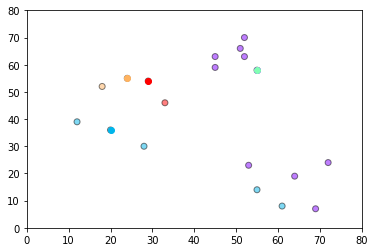

In [50]:
def plot_show():
    plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
    for i in centroids.keys():
        plt.scatter(*centroids[i], color=colors[i-1])
    plt.xlim(0, 80)
    plt.ylim(0, 80)
    plt.show()
plot_show()

In [137]:
def new_center(cluter,d):
    for i in range(d-1):
        print(i)
        centroids[cluter][i+1] = np.mean(df[df['closest'] == cluter][i+1])
    return

In [138]:
import copy

old_centroids = copy.deepcopy(centroids)

# Update tọa độ mỗi center sau mỗi vòng lặp 
def update(k):
    for i in centroids.keys():
        new_center(i,4)
    return k

centroids = update(centroids)
print(centroids)

0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
{1: [11, 30.9, 78.0, 29.1], 2: [17, 25.75, 83.5, 66.75], 3: [0, 4.5, 55.5, 90.0], 4: [43, 54.666666666666664, 64.66666666666667, 83.66666666666667], 5: [30, 40.72727272727273, 23.636363636363637, 47.72727272727273]}


In [140]:
centroids

{1: [11, 30.9, 78.0, 29.1],
 2: [17, 25.75, 83.5, 66.75],
 3: [0, 4.5, 55.5, 90.0],
 4: [43, 54.666666666666664, 64.66666666666667, 83.66666666666667],
 5: [30, 40.72727272727273, 23.636363636363637, 47.72727272727273]}

In [51]:
old_centroids = copy.deepcopy(centroids)

# Update tọa độ mỗi center sau mỗi vòng lặp 
def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

centroids = update(centroids)
print(centroids)

{1: [55.8, 45.2], 2: [35.2, 25.4], 3: [nan, nan], 4: [21.0, 53.5], 5: [31.0, 50.0]}


In [142]:
while old_centroids != centroids:
    df = assigment(df, centroids)
    print(df)
    old_centroids = copy.deepcopy(centroids)
    centroids = update(centroids)
    print(centroids)

df


,1,2,3,4,distance_from_1,distance_from_2,distance_from_3,distance_from_4,distance_from_5,closest
0,31,52,35,37,978,2246,4277,4084,2747,1
1,31,30,62,18,2825,3041,3454,3789,314,5
2,1,94,31,47,582,1746,3849,5228,8619,1
3,45,51,62,17,2132,1844,3195,1822,1525,5
4,69,35,10,16,5988,8372,12371,9318,5941,5
5,34,9,15,86,5614,8574,10601,11182,3561,5
6,11,75,42,20,0,776,2339,3314,4749,1
7,41,22,19,67,4238,6698,9081,8748,3171,5
8,14,98,92,80,3038,810,881,1046,7141,2
9,13,93,23,49,689,2141,4966,5337,8666,1


     x   y  distance_from_5  distance_from_1  distance_from_2  \
0   12  39        21.954498        44.236636        26.892378   
1   20  36        17.804494        36.963225        18.531055   
2   28  30        20.223748        31.684065         8.544004   
3   18  52        13.152946        38.406770        31.676490   
4   29  54         4.472136        28.207800        29.264313   
5   33  46         4.472136        22.814031        20.717143   
6   24  55         8.602325        33.275817        31.648065   
7   45  59        16.643317        17.523698        35.000000   
8   45  63        19.104973        20.820183        38.856145   
9   52  70        29.000000        25.089440        47.659207   
10  51  66        25.612497        21.346663        43.566042   
11  52  63        24.698178        18.201099        41.182521   
12  55  58        25.298221        12.824976        38.141841   
13  53  23        34.828150        22.375880        17.961069   
14  55  14        43.2666

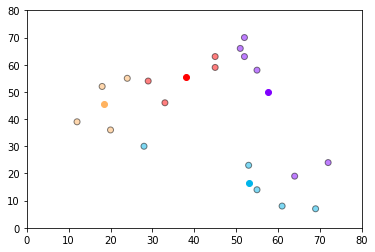

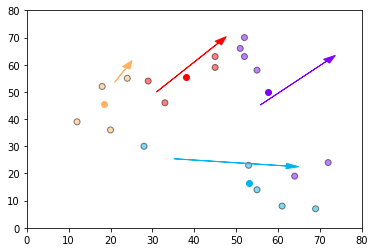

     x   y  distance_from_5  distance_from_1  distance_from_2  \
0   12  39        30.793668        46.972805        46.991489   
1   20  36        26.537709        40.184298        38.553858   
2   28  30        27.390692        35.778640        28.635642   
3   18  52        20.303941        39.717055        50.063959   
4   29  54         9.124144        28.944391        44.714651   
5   33  46        10.735455        24.988886        35.835736   
6   24  55        14.008926        34.035929        48.400413   
7   45  59         7.826238        15.538483        43.382024   
8   45  63        10.259142        18.150605        47.315959   
9   52  70        20.155644        20.787282        53.613431   
10  51  66        16.710775        17.333333        49.648766   
11  52  63        15.882380        14.181365        46.615448   
12  55  58        17.182840         8.432740        41.638924   
13  53  23        35.794553        27.400324         6.603030   
14  55  14        44.8469

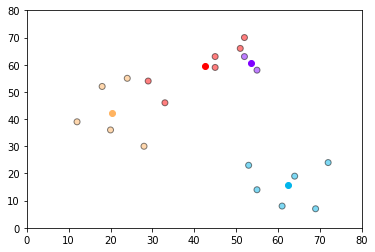

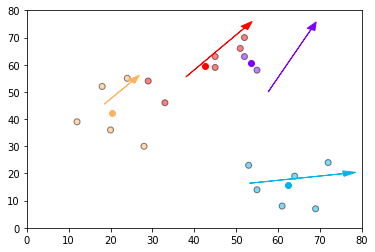

     x   y  distance_from_5  distance_from_1  distance_from_2  \
0   12  39        36.842382        46.738635        55.408834   
1   20  36        32.655185        41.503012        46.891423   
2   28  30        33.020616        39.755503        37.141247   
3   18  52        25.671536        36.503424        57.214266   
4   29  54        14.641076        25.347584        50.673519   
5   33  46        16.644151        25.109759        42.076980   
6   24  55        19.079512        30.008332        54.803943   
7   45  59         2.587362         8.631338        46.516723   
8   45  63         4.166667         8.860023        50.250760   
9   52  70        14.036658         9.617692        55.143500   
10  51  66        10.600052         6.041523        51.430914   
11  52  63        10.067826         2.915476        48.285321   
12  55  58        12.610622         2.915476        42.799598   
13  53  23        38.140457        37.503333        11.767422   
14  55  14        47.3465

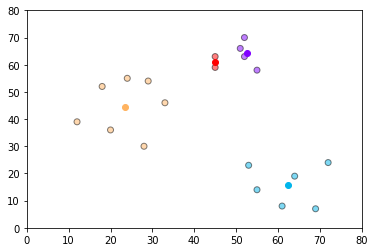

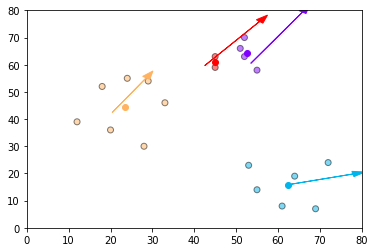

     x   y  distance_from_5  distance_from_1  distance_from_2  \
0   12  39        39.661064        47.726434        55.408834   
1   20  36        35.355339        43.061729        46.891423   
2   28  30        35.355339        42.110717        37.141247   
3   18  52        28.460499        36.610279        57.214266   
4   29  54        17.464249        25.638106        50.673519   
5   33  46        19.209373        26.707911        42.076980   
6   24  55        21.840330        29.963519        54.803943   
7   45  59         2.000000         9.154917        46.516723   
8   45  63         2.000000         7.603453        50.250760   
9   52  70        11.401754         5.771698        55.143500   
10  51  66         7.810250         2.304886        51.430914   
11  52  63         7.280110         1.346291        48.285321   
12  55  58        10.440307         6.731456        42.799598   
13  53  23        38.832976        41.253030        11.767422   
14  55  14        48.0520

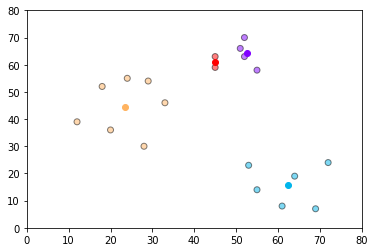

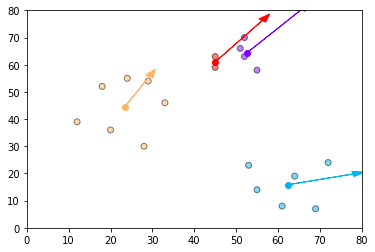

In [52]:
# Chạy K_means_clustering => điều kiện dừng khi tọa độ old_center = new_center
while old_centroids != centroids:
    df = assigment(df, centroids)
    print(df)
    old_centroids = copy.deepcopy(centroids)
    centroids = update(centroids)
    print(centroids)
    plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
    for i in centroids.keys():
        plt.scatter(*centroids[i], color=colors[i-1])
    plt.xlim(0, 80)
    plt.ylim(0, 80)
    plt.show()
    ax = plt.axes()
    plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
    for i in centroids.keys():
        plt.scatter(*centroids[i], color=colors[i-1])
    plt.xlim(0, 80)
    plt.ylim(0, 80)
    for i in old_centroids.keys():
        old_x = old_centroids[i][0]
        old_y = old_centroids[i][1]
        dx = (centroids[i][0]) - old_centroids[i][0]*0.75
        dy = (centroids[i][1]) - old_centroids[i][1]*0.75
        ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colors[i-1], ec=colors[i-1])
    plt.show()